In [40]:
import pandas as pd

df = pd.read_csv('./data/food.csv')
#df.drop(columns="Unnamed: 0", inplace=True)

df.head()

,날짜,월,식료품,소비자물가지수,전체공휴일,공휴일등락률,명절 유무,소비
0,201001,1,-10.7,0.007900,1,0.0,0,0
1,201002,2,22.1,0.002015,3,2.0,1,1
2,201003,3,-14.4,0.002023,1,-2.0,0,0
3,201004,4,-0.7,0.004026,0,-1.0,0,0
4,201005,5,9.7,0.001011,2,2.0,0,1


In [41]:
data = df[["날짜", "식료품", "소비자물가지수", "전체공휴일", "공휴일등락률", '명절 유무']]
target = df["소비"]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       148 non-null    int64  
 1   월        148 non-null    int64  
 2   식료품      148 non-null    float64
 3   소비자물가지수  148 non-null    float64
 4   전체공휴일    148 non-null    int64  
 5   공휴일등락률   148 non-null    float64
 6   명절 유무    148 non-null    int64  
 7   소비       148 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 9.4 KB


### 데이터 수동 분리

### 코로나 전, 후 데이터 분리

In [43]:
X_train = data[:84] 
X_test = data[85:] 
y_train = target[:84] 
y_test = target[85:] 

print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
         날짜   식료품   소비자물가지수  전체공휴일  공휴일등락률  명절 유무
85   201702 -38.7  0.002732      0    -4.0      0
86   201703  20.1 -0.000686      1     1.0      0
87   201704   2.2 -0.001261      0    -1.0      0
88   201705   9.0  0.001067      2     2.0      0
89   201706 -10.1 -0.002132      1    -1.0      0
..      ...   ...       ...    ...     ...    ...
143  202112   2.7  0.001637      1     1.0      0
144  202201  28.4  0.006248      1     0.0      0
145  202202 -37.9  0.005827      3     2.0      1
146  202203  11.4  0.007217      1    -2.0      0
147  202204   6.5  0.007449      0    -1.0      0

[63 rows x 6 columns]
y 테스트 데이터 :
[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1]


In [44]:
# 피처, 레이블 데이터 분포 비율

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/train_cnt)

학습 세트 Shape:(84, 6), 테스트 세트 Shape:(63, 6)
 학습 세트 레이블 값 분포 비율
1    0.571429
0    0.428571
Name: 소비, dtype: float64

 테스트 세트 레이블 값 분포 비율
1    0.47619
0    0.27381
Name: 소비, dtype: float64


In [45]:
print('X_train의 Shape:', X_train.shape)
print('y_train의 Shape:', y_train.shape)
print('X_test의 Shape:', X_test.shape)
print('y_train의 Shape:', y_test.shape)

X_train의 Shape: (84, 6)
y_train의 Shape: (84,)
X_test의 Shape: (63, 6)
y_train의 Shape: (63,)


### 코로나 전 후 DecisionTree, RandomForest, LogisticRegression 정확도

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

data = df[["날짜", "식료품", "소비자물가지수", "전체공휴일", "공휴일등락률", '명절 유무']]
target = df["소비"]

# X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=11)

dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11, n_jobs=-1)
lr_clf = LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf_time = time.time()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression roc_auc: {:0.3f}'.format(roc_auc_score(y_test, lr_pred)))
print('LogisticRegression 수행 시간: {0:.1f} 초'.format(time.time()-lr_clf_time))

# DecisionTreeClassifier 학습/예측/평가
dt_clf_time = time.time()
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('\nDecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, dt_pred)))
print('DecisionTree 수행 시간: {0:.1f} 초'.format(time.time()-dt_clf_time))

# RandomForestClassifier 학습/예측/평가
rf_clf_time = time.time()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('\nRandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier roc_auc: {:0.3f}'.format(roc_auc_score(y_test, rf_pred)))
print('RandomForest 수행 시간: {0:.1f} 초'.format(time.time()-rf_clf_time))

# 언더피팅인 LogisticRegression은 편향이 적고 분산이 높은 DecisionTreeClassifier 또는 RandomForestClassifier로 극복 가능
# 오버피팅인 DecisionTreeClassifier와 RandomFOrestClassifier는 학습 데이터에서 검증 데이터를 분리해 극복 가능

LogisticRegression 정확도: 0.9206
LogisticRegression roc_auc: 0.910
LogisticRegression 수행 시간: 0.0 초

DecisionTreeClassifier 정확도: 0.8571
DecisionTreeClassifier roc_auc: 0.869
DecisionTree 수행 시간: 0.0 초

RandomForestClassifier 정확도: 0.8889
RandomForestClassifier roc_auc: 0.876
RandomForest 수행 시간: 0.1 초


#### 최적화 작업 전이기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음.

### KFold
#### 검증 데이터 분리

In [47]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import numpy as np

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체 생성
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증
    for iter_count, (train_index, test_index) in enumerate(kfold.split(data)):
        X_train, X_test = data.values[train_index], data.values[test_index]
        y_train, y_test = target.values[train_index], target.values[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도: 0.8333
교차 검증 1 정확도: 0.9000
교차 검증 2 정확도: 0.8333
교차 검증 3 정확도: 0.8621
교차 검증 4 정확도: 0.7931
평균 정확도: 0.8444


In [48]:
# DecisionTree KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # DecisionTree 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.8333, 학습 데이터 크기: 118, 검증데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
학습 레이블 데이터 분포:
 1    72
0    46
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    13
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.9, 학습 데이터 크기: 118, 검증데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
학습 레이블 데이터 분포:
 1    74
0    44
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    15
1    15
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.8333, 학습 데이터 크기: 118, 검증데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
학습 레이블 데이터 분포:
 1    69
0    49
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    20
0    10
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.8621, 학습 데이터 크기: 119, 검증데이터 크기: 29
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
학습 레이블 데이터 분포:


In [49]:
# RandomForest KFold
cv_accuracy = []
kfold=KFold(n_splits=5)
n_iter = 0

# 학습 데이터세트의 인덱스는 수가 많아서 생략
for train_index, test_index in kfold.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # RandomForest 학습 및 예측
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    n_iter += 1
    
    # 정확도 예측
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 학습 및 검증 레이블 데이터 분포
    label_train = target.iloc[train_index]
    label_test = target.iloc[test_index]
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    cv_accuracy.append(accuracy)
    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.8667, 학습 데이터 크기: 118, 검증데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
학습 레이블 데이터 분포:
 1    72
0    46
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    13
Name: 소비, dtype: int64

#2 교차 검증 정확도 :0.8667, 학습 데이터 크기: 118, 검증데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
학습 레이블 데이터 분포:
 1    74
0    44
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 0    15
1    15
Name: 소비, dtype: int64

#3 교차 검증 정확도 :0.9, 학습 데이터 크기: 118, 검증데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
학습 레이블 데이터 분포:
 1    69
0    49
Name: 소비, dtype: int64
검증 레이블 데이터 분포:
 1    20
0    10
Name: 소비, dtype: int64

#4 교차 검증 정확도 :0.8276, 학습 데이터 크기: 119, 검증데이터 크기: 29
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
학습 레이블 데이터 분포:


In [50]:
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.8667
교차 검증 1 정확도: 0.8667
교차 검증 2 정확도: 0.9000
교차 검증 3 정확도: 0.8276
교차 검증 4 정확도: 0.9310
평균 정확도: 0.8784


### StratifiedKFold, cross_val_score()
#### 불균형한 분포도를 가진 레이블 데이터 집합에 사용

In [51]:
df['소비'].value_counts()

1    89
0    59
Name: 소비, dtype: int64

In [52]:
# DecisionTree StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))



1 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 31]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 60 61 63 64]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[56 57 58 59 62 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 86 87 88 91 92]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#4 검증 세트 인덱스:[ 85  89  90  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 112 115 116 117 118 119 120 122]

5 교차 검증 정확도 :0.7931, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#5 검증 세트 인덱스:[111 113 114 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147]

## 교차 검증별 정확도: [1.     1.     1.     1.     0.7931]
## 평균 검증 정확도: 0.95862


In [53]:
# RandomForest StratifiedKFold
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5)
n_iter=0
cv_accuracy=[]

for trian_index, test_index in skfold.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    rf_clf.fit(X_train, y_train)
    pred = rf_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 31]

2 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 60 61 63 64]

3 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[56 57 58 59 62 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 86 87 88 91 92]

4 교차 검증 정확도 :1.0, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#4 검증 세트 인덱스:[ 85  89  90  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 112 115 116 117 118 119 120 122]

5 교차 검증 정확도 :0.931, 학습 데이터 크기: 119, 검증 데이터 크기: 29
#5 검증 세트 인덱스:[111 113 114 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147]

## 교차 검증별 정확도: [1.    1.    1.    1.    0.931]
## 평균 검증 정확도: 0.9862


In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, data, target, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.8333
교차 검증 1 정확도: 0.9333
교차 검증 2 정확도: 0.8333
교차 검증 3 정확도: 0.8621
교차 검증 4 정확도: 0.7586
평균 정확도: 0.8441


### GridSearchCV
#### 교차 검증과 최적 하이퍼 파라미터 한번에 찾기

In [55]:
# DecisionTreeClassifier GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],\
            'min_samples_split':[2, 3, 5],\
            'min_samples_leaf':[1, 5, 8]}

def best_dtparam(clf, param, scoring_name, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, scoring=scoring_name, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
    
best_dtparam(dt_clf, parameters, 'accuracy', 5)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :0.8906
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.9310


In [56]:
# RandomForestClassifier GridSearchCV

parameters = {\
        'n_estimators':[100],\
        'max_depth' : [6, 8, 10, 12],\
        'min_samples_leaf' : [8, 12, 18],\
        'min_samples_split' : [8, 16, 20]
}

def best_rfparam(clf, param, cv_num, n_jobs_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, n_jobs=n_jobs_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(rf_clf, parameters, 2, -1)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 6, 'min_samples_leaf': 12, 'min_samples_split': 8, 'n_estimators': 100}
GridSearchCV 최고 정확도 :0.8823
테스트 세트에서의 RandomForestClassifier 정확도 : 0.9655


In [57]:
# 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=12, min_samples_split=8, random_state=11)
rf_clf1.fit(X_train, y_train)
rf1_pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9310


### 피처중요도

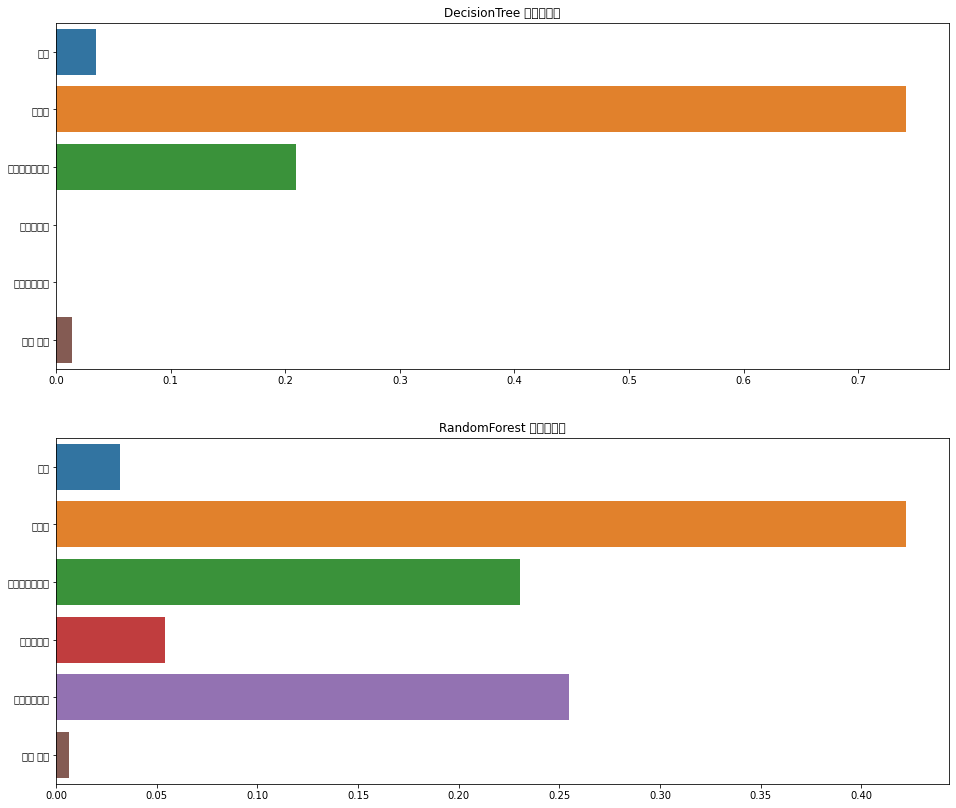

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(2, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

plt.show()

### GBM

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=11)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f} 초'.format(time.time()-start_time))

GBM 정확도: 0.7931
GBM 수행 시간: 0.0 초


In [60]:
# GBM GridSearchCV

parameters = {\
        'n_estimators':[100, 300, 500],\
        'learning_rate' : [0.025, 0.05, 0.1],
}

def best_rfparam(clf, param, cv_num, verbose_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num, verbose=verbose_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 GBMClassifier 정확도 : {0:.4f}'.format(accuracy))

best_rfparam(gb_clf, parameters, 2, 2)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=100; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=300; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=300; total time=   0.0s
[CV] END ..............learning_rate=0.025, n_estimators=500; total time=   0.1s
[CV] END ..............learning_rate=0.025, n_estimators=500; total time=   0.1s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=300; total time=   0.0s
[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   0.1s
[CV] END ...............learning_rate=0.05, n_est

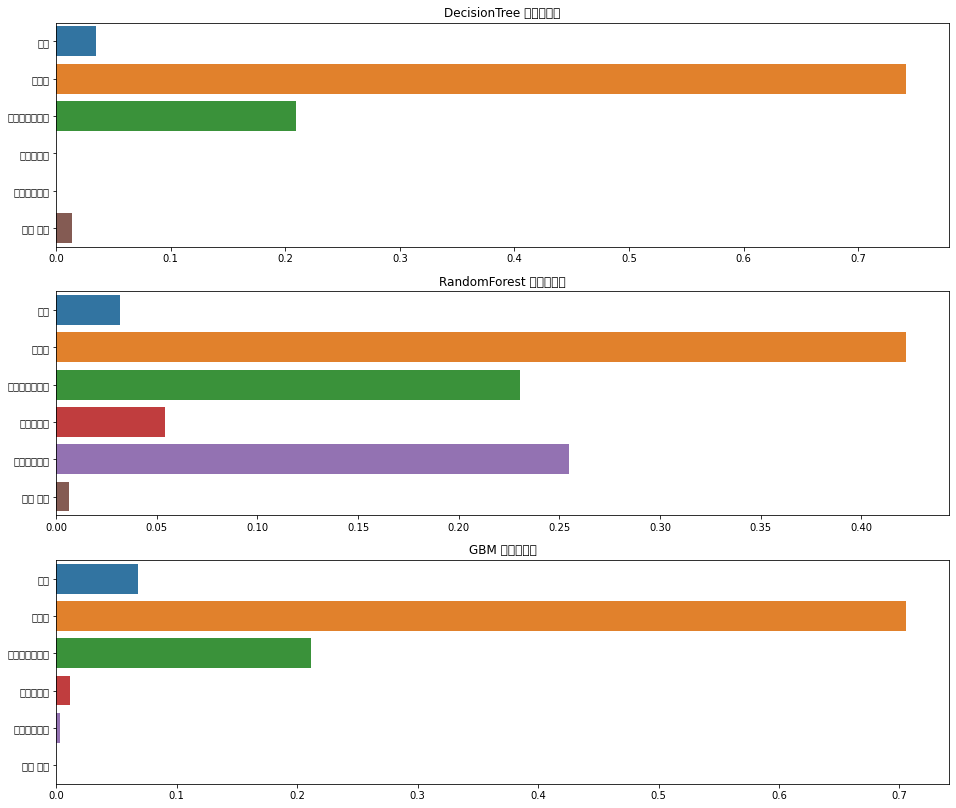

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(3, 1, squeeze=False)
fig.set_size_inches((16,14))

plt.title("피처중요도")
sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")
sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")
sns.barplot(x=gb_clf.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

plt.show()

### XGBoost

In [62]:
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

params = {'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'error',
        'early_stoppings':100
        }

num_rounds = 400

wlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
pred_probs = xgb_model.predict(dtest) 
print('predict() 수행 결괐값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

NameError: name 'xgb_model' is not defined

In [ ]:
get_clf_eval(y_test, preds, pred_probs) # 밑에 함수 여기! 에 있는 것을 가져와서 실행

NameError: name 'preds' is not defined

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

ModuleNotFoundError: No module named 'xgboost'

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict(X_test)

get_clf_eval(y_test, w_preds, w_pred_proba)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=1)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)

NameError: name 'XGBClassifier' is not defined

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

NameError: name 'get_clf_eval' is not defined

In [ ]:
# XGBClassifier GridSearchCV

parameters = {\
        'max_depth':[3, 4, 5],\
        'min_child_weight' : [1, 3, 5],\
        'colsample_bytree' : [0.25, 0.5, 0.75]
}

def best_xgbcparam(clf, param, cv_num):
    grid_cv = GridSearchCV(clf, param_grid=param, cv=cv_num)
    grid_cv.fit(X_train, y_train)
    
    print('GridSearchCV 최적 하이퍼 파라미터 :', grid_cv.best_params_)
    print('GridSearchCV 최고 정확도 :{0:.4f}'.format(grid_cv.best_score_))
    best_clf = grid_cv.best_estimator_
    
    # GridSearchCV의 최적 하이퍼 마라미터로 학습된 Estimator로 예측 및 평가 수행
    dpredictions = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, dpredictions)
    print('테스트 세트에서의 XGBClassifier 정확도 : {0:.4f}'.format(accuracy))
    
    xgb_roc_score = roc_auc_score(y_test, grid_cv.predict_proba(X_test)[:, 1], average='macro')
    print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

best_xgbcparam(xgb_wrapper, parameters, 3)

NameError: name 'xgb_wrapper' is not defined

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators=1000, random_state=11, learning_rate=0.02, max_depth=4, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_wrapper.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

NameError: name 'XGBClassifier' is not defined

NameError: name 'xgb_wrapper' is not defined

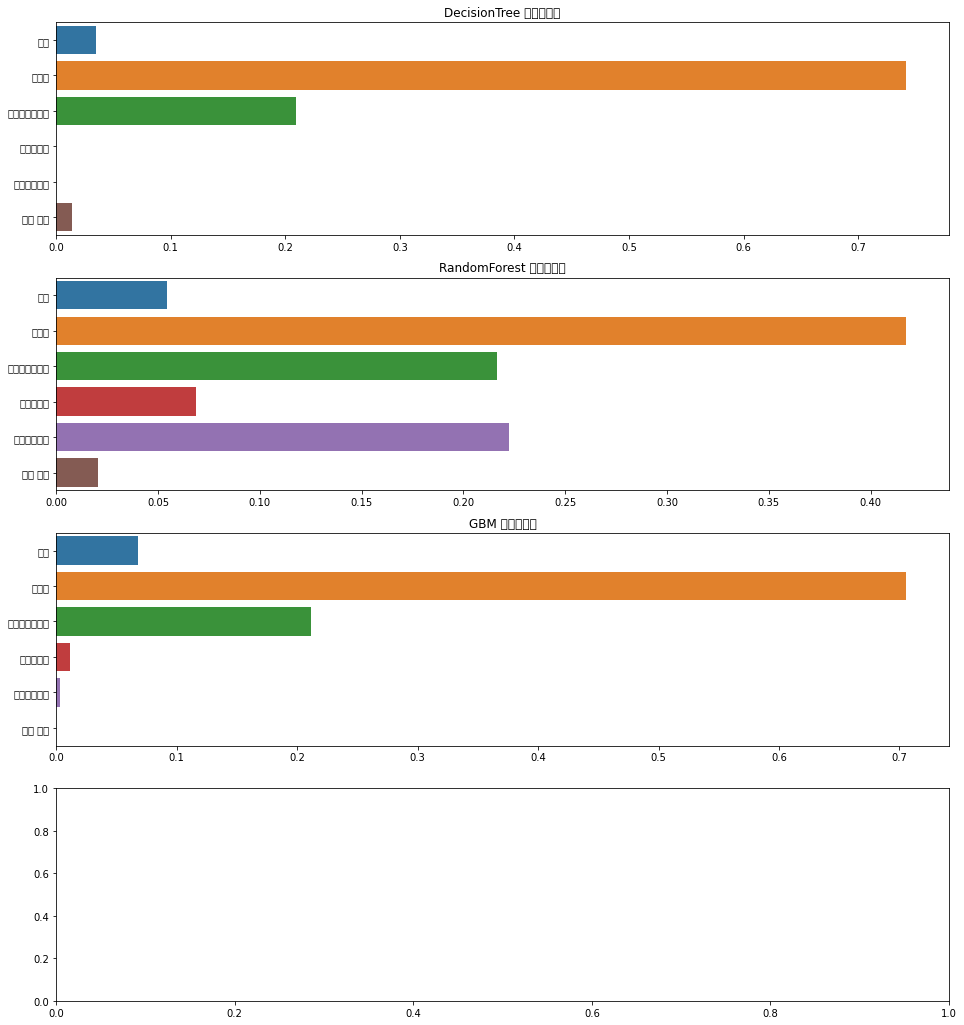

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"

fig, axes = plt.subplots(4, 1, squeeze=False)
fig.set_size_inches((16, 18))

sns.barplot(x=dt_clf.feature_importances_, y=data.columns, ax=axes[0,0])
axes[0,0].title.set_text("DecisionTree 피처중요도")

sns.barplot(x=rf_clf1.feature_importances_, y=data.columns, ax=axes[1,0])
axes[1,0].title.set_text("RandomForest 피처중요도")

sns.barplot(x=gb_clf.feature_importances_, y=data.columns, ax=axes[2,0])
axes[2,0].title.set_text("GBM 피처중요도")

sns.barplot(x=xgb_wrapper.feature_importances_, y=data.columns, ax=axes[3,0])
axes[3,0].title.set_text("XGBClassifier 피처중요도")

plt.show()

## 평가

### 오차행렬
#### TN : 환자를 암이 아니라 예측했고 실제로도 암이 아님
#### FP : 환자를 암이 맞다고 예측했고 실제로는 암이 아님 -> 1종 오류
#### FN : 환자를 암이 아니라 예측했고 실제로는 암이 맞음 -> 2종 오류
#### TP : 환자를 암이 맞다고 예측했고 실제로도 암
이 맞음

In [ ]:
dt_pred.info(

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [ ]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, dt_pred)
print("오차행렬:\n", c_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [29, 63]

### 정밀도와 재현율
#### 정밀도 = TP / (FP + TP), 양성으로 판단한 것 중, 진짜 양성의 비율, FP를 낮추는데 초점
#### 재현율 = TP / (FN + TP), 진짜 양성인 것들 중, 올바르게 양성으로 판단한 비율, FN을 낮추는데 초점
#### 소비가 많은 월을 0이라 판단하게 되면 큰 영향이 발생하기 때문에 재현율이 더 중요하다.
#### 소비가 많이 없는 월을 1이라 판단하더라도 혜택이 있다면 소비가 늘어날 수도있기 때문에 정밀도<재현율

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
get_clf_eval(y_test, rf1_pred)

오차 행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000


### 정밀도/재현율 트레이드오프
#### 정밀도와 재현율 값이 똑같이 나왔기 때문에 더 중요한 재현율 값을 올려준다.

In [ ]:
pred_proba = rf_clf1.predict_proba(X_test)
pred = rf_clf1.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출: \n', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: \n', pred_proba_result[:3])

pred_proba()결과 Shape : (29, 2)
pred_proba array에서 앞 3개만 샘플로 추출: 
 [[0.60439496 0.39560504]
 [0.85912887 0.14087113]
 [0.81893225 0.18106775]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측: 
 [[0.60439496 0.39560504 0.        ]
 [0.85912887 0.14087113 0.        ]
 [0.81893225 0.18106775 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

# 오차행렬, 정확도, 정밀도, 재현율 함수 여기!
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[ 8  3]
 [ 0 18]]
정확도: 0.8966, 정밀도: 0.8571, 재현율: 1.0000
임곗값: 0.45
오차 행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000
임곗값: 0.5
오차 행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000
임곗값: 0.55
오차 행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000
임곗값: 0.6
오차 행렬
[[10  1]
 [ 3 15]]
정확도: 0.8621, 정밀도: 0.9375, 재현율: 0.8333


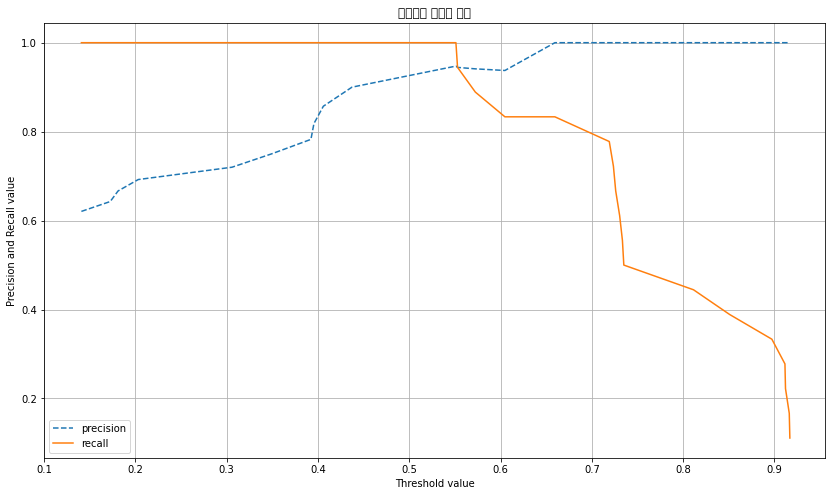

In [ ]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(14, 8))    
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') #정밀도
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall') # 재현율 /// #임계값 0.45
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.title("정밀도와 재현율 곡선")
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, rf_clf1.predict_proba(X_test)[:, 1])

# 임계값이 낮을수록 재현율은 높고, 정밀도는 낮다.
# 임계값이 클수록 재현율은 낮고, 정밀도는 높다.

### F1 스코어
#### 정밀도와 재현율 결합 지표

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, rf1_pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9730


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율 함수에 F1스코어 추가
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.2, 0.3, 0.4, 0.5, 0.55, 0.6] # 임계값 4.5 
pred_proba = rf_clf1.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

# 임곗값이 0.5일 때 재현율이 정밀도 보다 높고 정확도와 F1 스코어 역시 좋은 수치
# 정확도: 0.8636, 정밀도: 0.8571, 재현율: 0.9231, F1:0.8889

임곗값: 0.2
오차행렬
[[ 3  8]
 [ 0 18]]
정확도: 0.7241, 정밀도: 0.6923, 재현율: 1.0000, F1:0.8182
임곗값: 0.3
오차행렬
[[ 4  7]
 [ 0 18]]
정확도: 0.7586, 정밀도: 0.7200, 재현율: 1.0000, F1:0.8372
임곗값: 0.4
오차행렬
[[ 8  3]
 [ 0 18]]
정확도: 0.8966, 정밀도: 0.8571, 재현율: 1.0000, F1:0.9231
임곗값: 0.5
오차행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000, F1:0.9730
임곗값: 0.55
오차행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000, F1:0.9730
임곗값: 0.6
오차행렬
[[10  1]
 [ 3 15]]
정확도: 0.8621, 정밀도: 0.9375, 재현율: 0.8333, F1:0.8824


### ROC 곡선과 AUC
#### 이진 분류 모델 예측 성능 판단 평가 지표
#### 민감도(TPR), 재현율: 실제값 positive가 정확히 예측돼야 하는 수준
#### 특이성(TNR): 실제값 negative가 정확히 예측돼야 하는 수준

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률
pred_proba_class1 = rf_clf1.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# thresholds[0]은 max(예측확률)+1로 임의 설정. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0])

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3)) # 특이도
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3)) # 1-민감도

샘플 추출을 위한 임곗값 배열의 index: [1 2 3 4 5 6 7]
샘플 index로 추출한 임곗값:  [0.91 0.9  0.89 0.69 0.63 0.57 0.16]
샘플 임곗값별 FPR:  [0.    0.    0.    0.    0.091 0.091 1.   ]
샘플 임곗값별 TPR:  [0.056 0.111 0.333 0.833 0.833 1.    1.   ]


In [ ]:
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어 함수에 ROC_AUC 추가
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, rf1_pred, rf_clf1.predict_proba(X_test)[:, 1])

오차행렬
[[10  1]
 [ 0 18]]
정확도: 0.9655, 정밀도: 0.9474, 재현율: 1.0000, F1:0.9730, AUC:0.9848


### 최적 임곗값 적용

In [63]:
binarizer = Binarizer(threshold=0.5) # 0.5나 0.55

pred_th_06 = binarizer.fit(pred_proba_class1.reshape(-1, 1))
custom_predict = binarizer.transform(pred_proba_class1.reshape(-1, 1))

get_clf_eval(y_test, custom_predict, rf_clf1.predict_proba(X_test)[:, 1])

NameError: name 'pred_proba_class1' is not defined

#### ROC 곡선 시각화

NameError: name 'fprs' is not defined

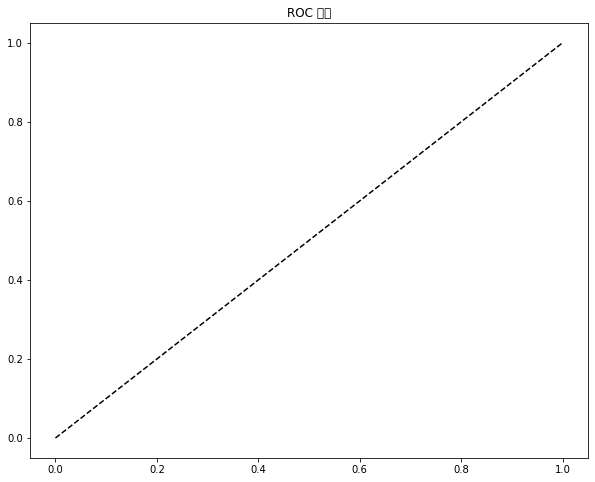

In [64]:
plt.figure(figsize=(10,8))

plt.title("ROC 곡선")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.plot(fprs, tprs, label="RandomForestClassifier")
plt.xlabel('FPR(1 - Sensitivity)')
plt.ylabel('TPR( Recall )')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score

pred_proba = rf_clf1.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9848


In [66]:
from sklearn.tree import export_graphviz
from sklearn import tree

feature_names = ["날짜", "식료품", "소비자물가지수", "전체공휴일", "공휴일등락률", '명절 유무']
target_names = ["0", "1"]

plt.rcParams["font.family"] = "Malgun Gothic"

plt.figure(figsize=(16,10))
export_graphviz(dt_clf, 
                out_file="./data/tree_corona.dot",
                class_names=target_names, 
                feature_names=feature_names, 
                impurity=True, 
                filled=True, 
                rounded=True
                )

<Figure size 1152x720 with 0 Axes>

In [67]:
import graphviz

with open('./data/tree_corona.dot', encoding='UTF-8') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

### 랜덤 포레스트 시각화

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


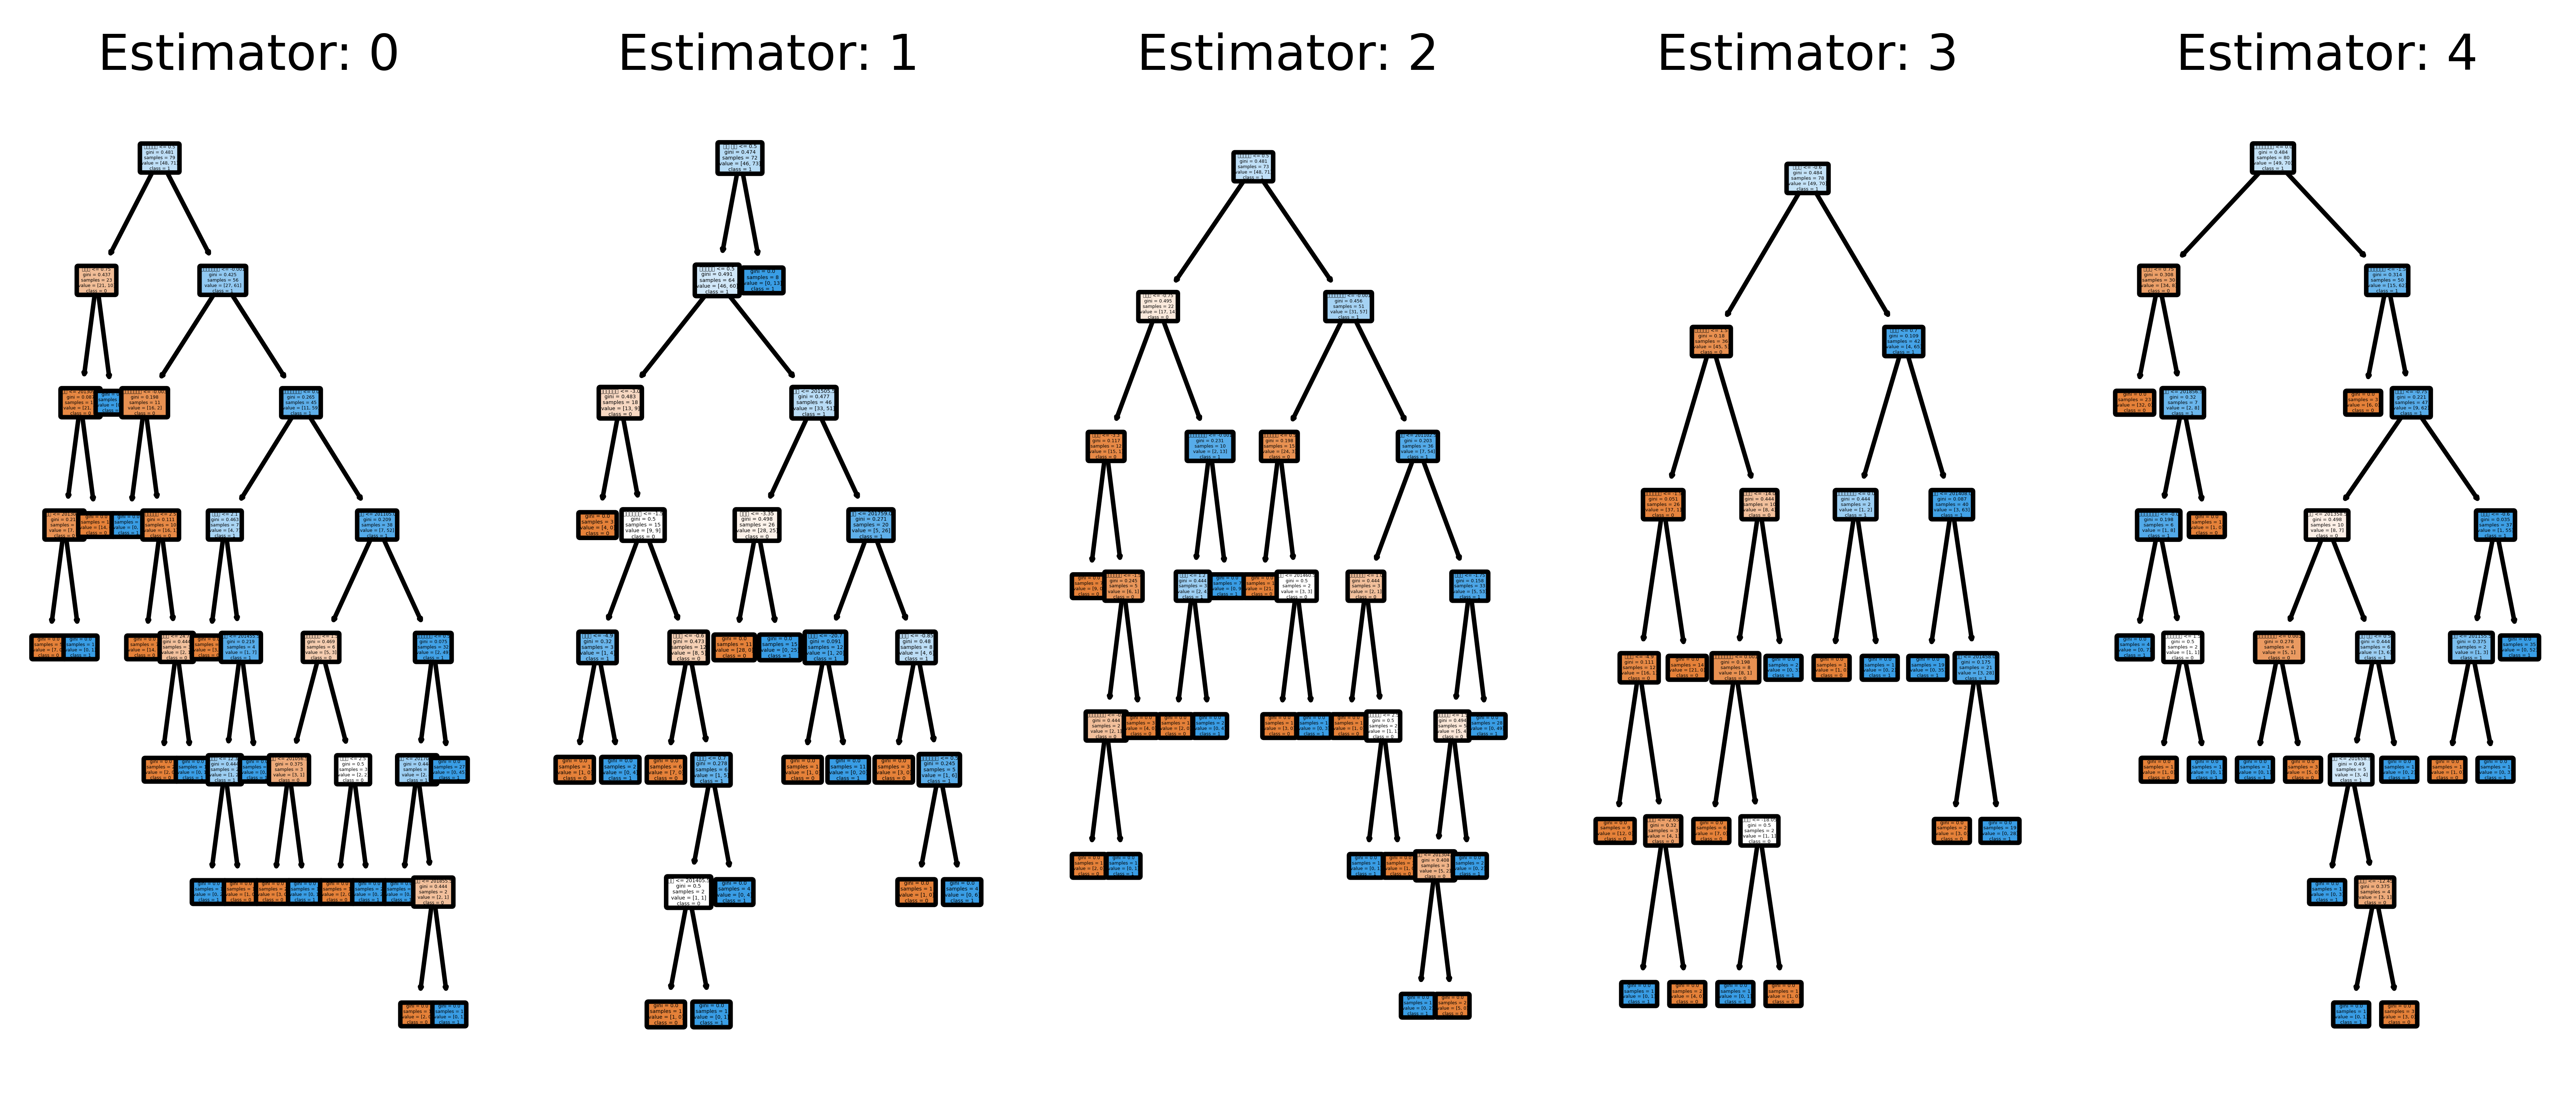

In [68]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (10, 4), dpi=900)

for index in range(0, 5):
    tree.plot_tree(rf_clf.estimators_[index],
                   feature_names = feature_names, 
                   class_names=target_names,
                   impurity=True,
                   filled = True,
                   rounded = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_clf1_5trees.png')